Tratamento das colunas

In [105]:
import pandas as pd
import numpy as np

In [106]:
df = pd.read_csv("Obesity.csv")

In [107]:
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [108]:
df.shape

(2111, 17)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [110]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [111]:
df['Obesity'].value_counts()

Obesity
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [112]:
df.isnull().sum()

Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
dtype: int64

In [113]:
df['IMC'] = df['Weight'] / (df['Height'] ** 2)
df['IMC'] = df['IMC'].round(2)

In [114]:
df[['Weight', 'Height', 'IMC']].head()


,Weight,Height,IMC
0,64.0,1.62,24.39
1,56.0,1.52,24.24
2,77.0,1.80,23.77
3,87.0,1.80,26.85
4,89.8,1.78,28.34


In [115]:
colunas_binarias = [
    'family_history',
    'FAVC',
    'SMOKE',
    'SCC'
]

for col in colunas_binarias:
    df[col] = df[col].str.lower().str.strip()

In [116]:
for col in colunas_binarias:
    print(col, df[col].unique())

family_history ['yes' 'no']
FAVC ['no' 'yes']
SMOKE ['no' 'yes']
SCC ['no' 'yes']


In [117]:
colunas_categoricas = ['CAEC', 'CALC', 'MTRANS']

for col in colunas_categoricas:
    df[col] = df[col].str.strip()

In [118]:
for col in colunas_categoricas:
    print(col, df[col].unique())

CAEC ['Sometimes' 'Frequently' 'Always' 'no']
CALC ['no' 'Sometimes' 'Frequently' 'Always']
MTRANS ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']


In [119]:
colunas_discretas = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

for col in colunas_discretas:
    df[col] = df[col].round().astype(int)

In [120]:
df[colunas_discretas].describe()

,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,2.423496,2.687826,2.014685,1.006632,0.664614
std,0.583905,0.809680,0.688616,0.895462,0.674009
min,1.000000,1.000000,1.000000,0.000000,0.000000
25%,2.000000,3.000000,2.000000,0.000000,0.000000
50%,2.000000,3.000000,2.000000,1.000000,1.000000
75%,3.000000,3.000000,2.000000,2.000000,1.000000
max,3.000000,4.000000,3.000000,3.000000,2.000000


In [121]:
df['FCVC'].value_counts().sort_index()
df['NCP'].value_counts().sort_index()
df['CH2O'].value_counts().sort_index()
df['FAF'].value_counts().sort_index()
df['TUE'].value_counts().sort_index()

TUE
0    952
1    915
2    244
Name: count, dtype: int64

In [122]:
colunas_categoricas_finais = [
    'Gender', 'family_history', 'FAVC', 'CAEC', 
    'SMOKE', 'SCC', 'CALC', 'MTRANS', 'Obesity'
]

for col in colunas_categoricas_finais:
    df[col] = df[col].astype('category')

In [123]:
df.dtypes

Gender            category
Age                float64
Height             float64
Weight             float64
family_history    category
FAVC              category
FCVC                 int64
NCP                  int64
CAEC              category
SMOKE             category
CH2O                 int64
SCC               category
FAF                  int64
TUE                  int64
CALC              category
MTRANS            category
Obesity           category
IMC                float64
dtype: object

In [124]:
df.isnull().sum()

Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
IMC               0
dtype: int64

In [125]:
df.duplicated().sum()

np.int64(24)

In [126]:
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity,IMC
0,Female,21.0,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight,24.39
1,Female,21.0,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight,24.24
2,Male,23.0,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight,23.77
3,Male,27.0,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I,26.85
4,Male,22.0,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II,28.34


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Gender          2111 non-null   category
 1   Age             2111 non-null   float64 
 2   Height          2111 non-null   float64 
 3   Weight          2111 non-null   float64 
 4   family_history  2111 non-null   category
 5   FAVC            2111 non-null   category
 6   FCVC            2111 non-null   int64   
 7   NCP             2111 non-null   int64   
 8   CAEC            2111 non-null   category
 9   SMOKE           2111 non-null   category
 10  CH2O            2111 non-null   int64   
 11  SCC             2111 non-null   category
 12  FAF             2111 non-null   int64   
 13  TUE             2111 non-null   int64   
 14  CALC            2111 non-null   category
 15  MTRANS          2111 non-null   category
 16  Obesity         2111 non-null   category
 17  IMC           

Features/Target/Pipeline

In [128]:
X = df.drop(columns='Obesity')
y = df['Obesity']

In [129]:
colunas_numericas = [
    'Age', 'Height', 'Weight', 'IMC',
    'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'
]

colunas_categoricas = [
    'Gender', 'family_history', 'FAVC', 'CAEC',
    'SMOKE', 'SCC', 'CALC', 'MTRANS'
]

In [130]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [131]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [132]:
preprocessador = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), colunas_numericas),
        ('cat', OneHotEncoder(handle_unknown='ignore'), colunas_categoricas)
    ]
)

In [133]:
from sklearn.ensemble import RandomForestClassifier

In [134]:
modelo = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)

In [135]:
from sklearn.pipeline import Pipeline

In [136]:
pipeline = Pipeline(steps=[
    ('preprocessamento', preprocessador),
    ('modelo', modelo)
])

In [137]:
pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessamento', ...), ('modelo', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transforme

In [138]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [139]:
y_pred = pipeline.predict(X_test)

In [140]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9739952718676123

In [141]:
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.98      0.99        54
      Normal_Weight       0.89      0.98      0.93        58
     Obesity_Type_I       0.99      1.00      0.99        70
    Obesity_Type_II       0.98      0.98      0.98        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.98      0.90      0.94        58
Overweight_Level_II       0.98      0.98      0.98        58

           accuracy                           0.97       423
          macro avg       0.97      0.97      0.97       423
       weighted avg       0.98      0.97      0.97       423



In [142]:
import seaborn as sns
import matplotlib.pyplot as plt


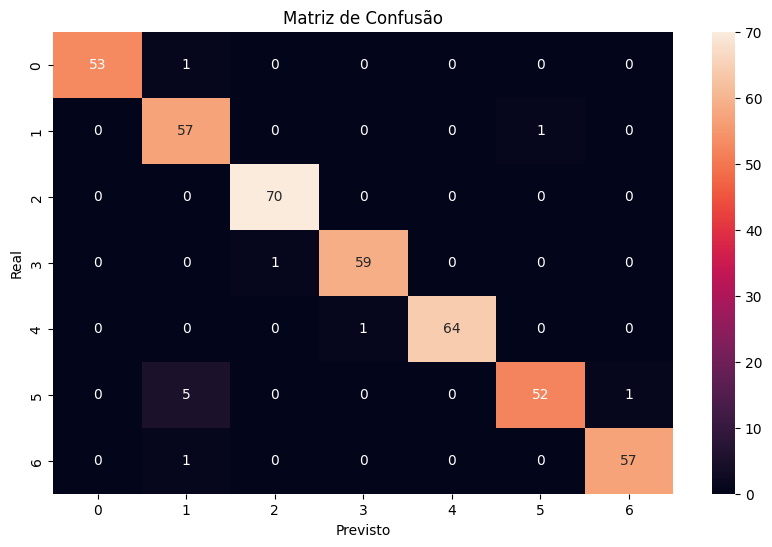

In [143]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

In [144]:
import joblib

In [145]:
joblib.dump(pipeline, 'pipeline_obesity.pkl')

['pipeline_obesity.pkl']